In [2]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
# from scipy.integrate import odeint
# from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import pandas as pd

header =['SDSS', 'per', 'vtype']
CVs = pd.read_fwf('tablea1.dat', names=header, index_col=False, colspecs=[(0,23), (76,88), (144,157)])
CVs = CVs.dropna(subset=['per'])
CVs['per'] = CVs['per']*24*60

non_polars = CVs
non_polars = non_polars[non_polars['vtype'].str.startswith('Polar')==False]
non_polars = non_polars[non_polars['vtype'].str.startswith('PREP')==False]
non_polars = non_polars[non_polars['vtype'].str.startswith('IP')==False]

non_polars_arr = non_polars['per'].to_numpy()


def LogL(lower_bound, upper_bound, periods, alfa):
    masked_periods = ma.masked_outside(periods, lower_bound, upper_bound)
    masked_periods = masked_periods.compressed()
    likelihood = -1000
    new_likelihood = 0
    res_period = 0
    for period in masked_periods:    
        N0 = np.count_nonzero(period > masked_periods)
        N1 = np.count_nonzero(period < masked_periods)
        N = N1 + N0
        delta0 = period - lower_bound
        delta1 = - period + upper_bound
        summand0 = N0 * np.log((N0 + alfa - 1) / (delta0 * (N + 2 * alfa - 1)))
        summand1 = N1 * np.log((N1 + alfa - 1) / (delta1 * (N + 2 * alfa - 1)))
        new_likelihood = summand0 + summand1
        if new_likelihood > likelihood:
            likelihood = new_likelihood
            res_period = period
    return res_period
# fig, axes = plt.subplots(1, 1, figsize=(5,5))
# axes.hist(non_polars['per'], bins=20)
# plt.show()
# print(non_polars_arr)
# LogL_vals = LogL(100, 300, non_polars_arr, 2)
print(LogL(150, 230, non_polars_arr, 1+1e-6))
# print(non_polars[non_polars.isna().any(axis=1)])

168.624


In [73]:
def LogL(lower_bound, upper_bound, periods, alfa):
    likelihood = -1000
    new_likelihood = 0
    res_period = 0
    res_periods = np.array([])
    for upper in upper_bound:
        for lower in lower_bound:
            masked_periods = ma.masked_outside(periods, lower, upper)
            masked_periods = masked_periods.compressed()
            for period in masked_periods:
                N0 = np.count_nonzero(period > masked_periods)
                N1 = np.count_nonzero(period < masked_periods)
                N = N1 + N0
                delta0 = period - lower
                delta1 = - period + upper
                summand0 = N0 * np.log((N0 + alfa - 1) / (delta0 * (N + 2 * alfa - 1)))
                summand1 = N1 * np.log((N1 + alfa - 1) / (delta1 * (N + 2 * alfa - 1)))
                new_likelihood = summand0 + summand1
                if new_likelihood > likelihood:
                    likelihood = new_likelihood
                    res_period = period
            res_periods = np.append(res_periods, res_period)
            likelihood = -1000
            res_period = 0
    return res_periods

lower_bounds = np.arange(150, 171, 1)
upper_bounds = np.arange(230, 251, 1)
vals = LogL(lower_bounds, upper_bounds, non_polars_arr, 1+1e-6)


In [74]:
vals.reshape(21,21)
np.unique(vals.reshape(21,21))

array([168.624  , 175.68   , 181.44   , 192.40704, 235.4688 , 245.9088 ])

Text(0, 0.5, 'Upper bound [min]')

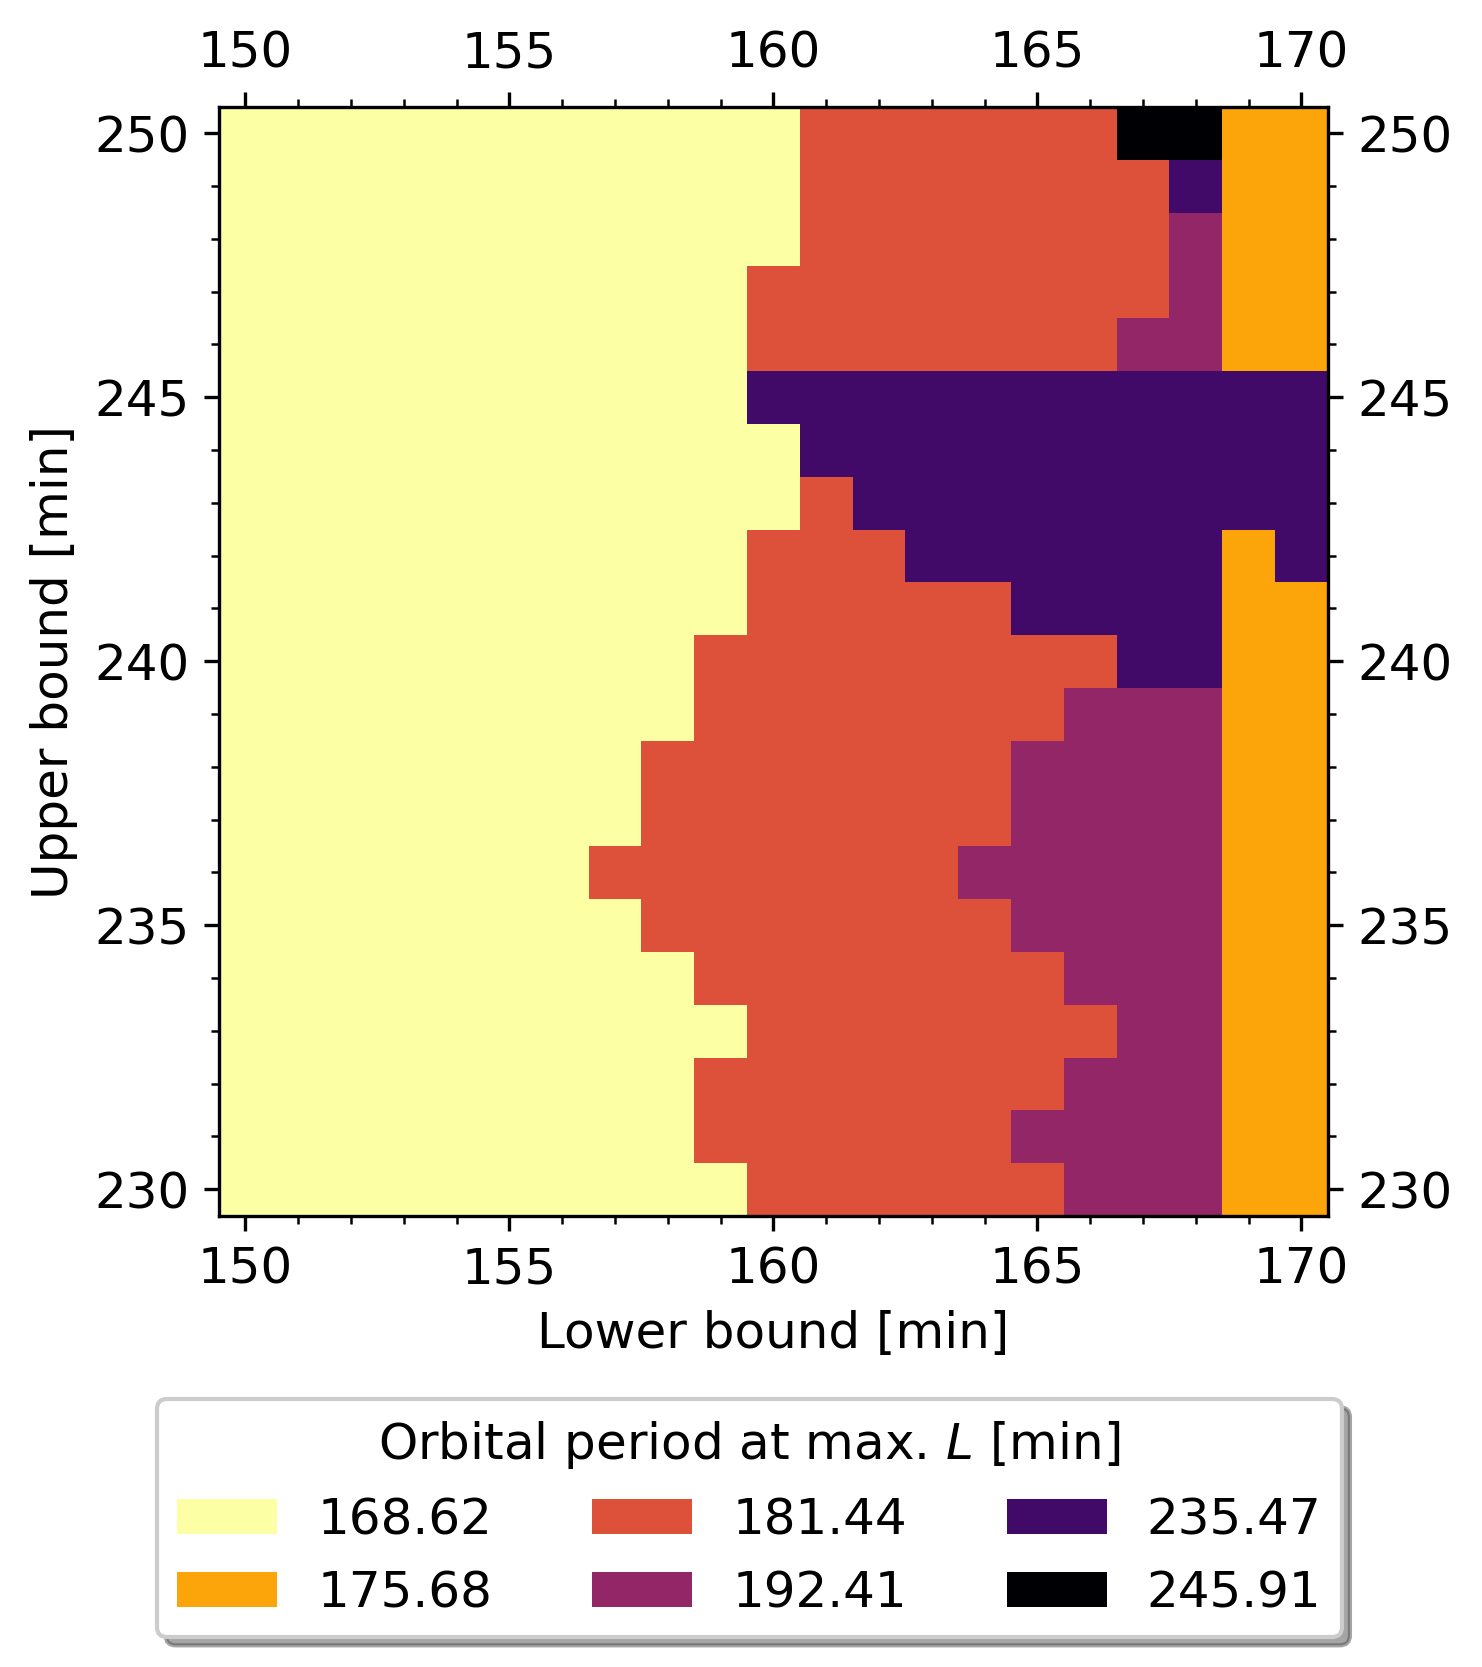

In [118]:

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.patches import Patch
color_map = {168.62: np.array([252, 255, 164]), 
             175.68: np.array([252, 165, 10]), 
             181.44: np.array([221, 81, 58]), 
             192.41: np.array([147, 38, 103]), 
             235.47: np.array([66, 10, 104]),
             245.91: np.array([0, 0, 4]),
             } 


data = np.round(vals.reshape(21,21), 2)

data_3d = np.ndarray(shape=(data.shape[0], data.shape[1], 3), dtype=int)
for i in range(0, data.shape[0]):
    for j in range(0, data.shape[1]):
        data_3d[i][j] = color_map[data[i][j]]

fig, ax = plt.subplots(1, 1, dpi=300)
im = ax.imshow(data_3d, origin='lower')

legend_elements = [Patch(facecolor=color_map[key]/255.0, label=f'{key:.2f}') for key in color_map]
ax.legend(handles=legend_elements, bbox_to_anchor=(0.5, -0.2), loc="lower center",bbox_transform=fig.transFigure, ncol=3, fancybox=True, shadow=True, fontsize=12, title="Orbital period at max. $L$ [min]", title_fontsize=12)
ax.set_xticks(np.arange(0, 21, 5), labels=np.arange(150, 171, 5))
ax.set_yticks(np.arange(0, 21, 5), labels=np.arange(230, 251, 5))
ax.xaxis.set_minor_locator(MultipleLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(labelsize=12, labelbottom=True, labelleft=True, labelright=True, labeltop=True, top=True, bottom=True, left=True, right=True, which='both')
ax.set_xlabel('Lower bound [min]', fontsize=12)
ax.set_ylabel('Upper bound [min]', fontsize=12)

Text(0, 0.5, 'Upper bound [min]')

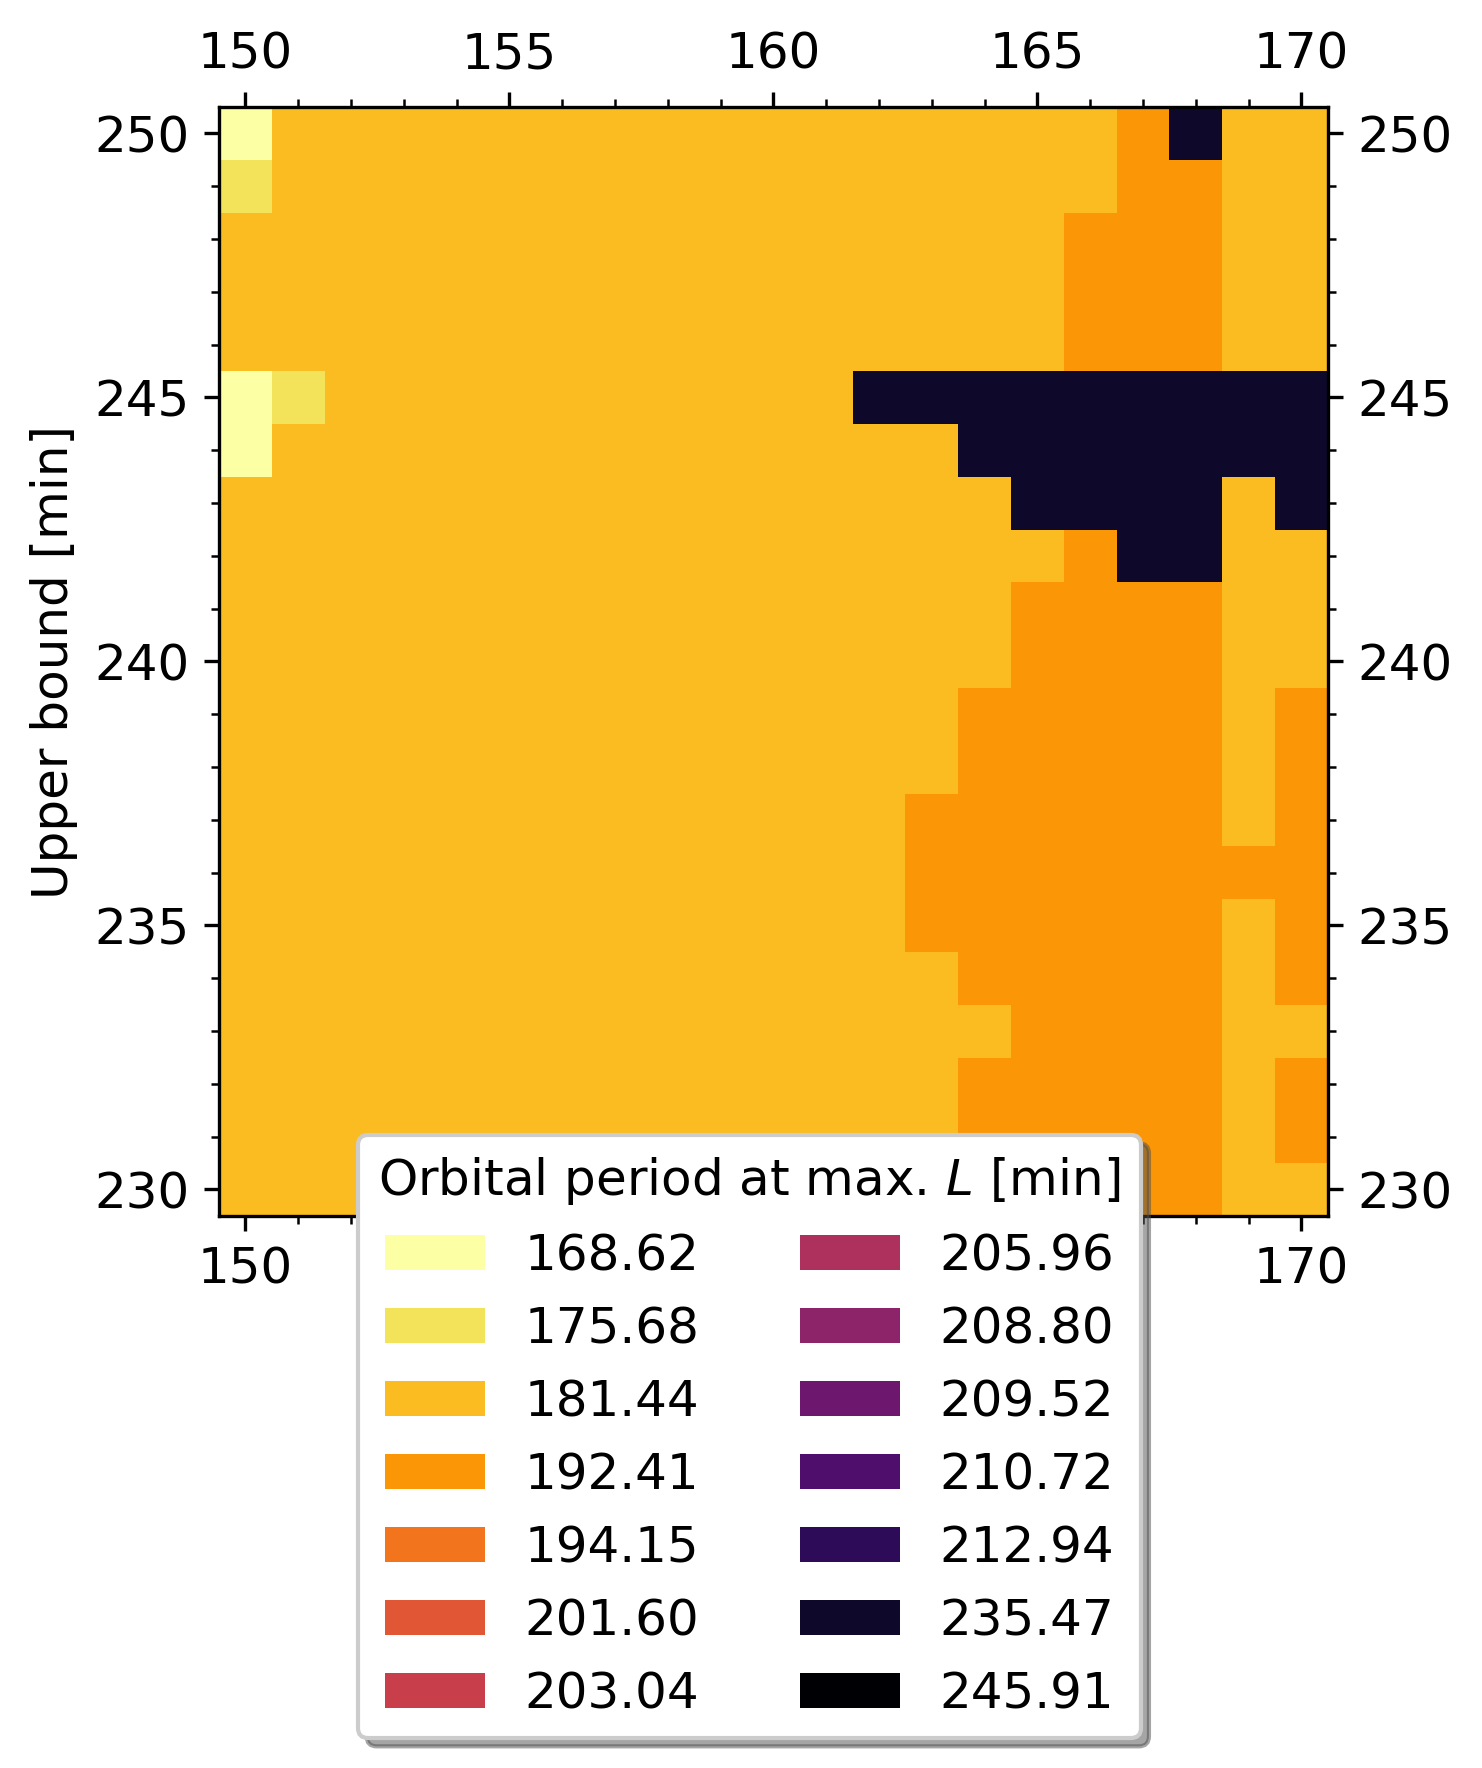

In [28]:
lower_bounds = np.arange(150, 171, 1)
upper_bounds = np.arange(230, 251, 1)
vals = LogL(lower_bounds, upper_bounds, non_polars_arr, 2)

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.patches import Patch
color_map = {168.62: np.array([252, 255, 164]), 
             175.68: np.array([243, 227, 90]), 
             181.44: np.array([251, 188, 33]), 
             192.41: np.array([251, 150, 6]), 
             194.15: np.array([242, 116, 28]),
             201.6 : np.array([225, 86, 53]),
             203.04: np.array([200, 63, 75]),
             205.96: np.array([173, 48, 93]),
             208.8 : np.array([141, 35, 105]),
             209.52: np.array([109, 24, 110]),
             210.72: np.array([79, 13, 108]),
             212.94: np.array([45, 11, 89]),
             235.47: np.array([14, 9, 43]),
             245.91: np.array([0, 0, 4]),
             } 

data = np.round(vals.reshape(21,21), 2)

data_3d = np.ndarray(shape=(data.shape[0], data.shape[1], 3), dtype=int)
for i in range(0, data.shape[0]):
    for j in range(0, data.shape[1]):
        data_3d[i][j] = color_map[data[i][j]]

fig, ax = plt.subplots(1, 1, dpi=300)
im = ax.imshow(data_3d, origin='lower')

legend_elements = [Patch(facecolor=color_map[key]/255.0, label=f'{key:.2f}') for key in color_map]
ax.legend(handles=legend_elements, bbox_to_anchor=(0.5, -0.27), loc="lower center",bbox_transform=fig.transFigure, ncol=2, fancybox=True, shadow=True, fontsize=12, title="Orbital period at max. $L$ [min]", title_fontsize=12)
ax.set_xticks(np.arange(0, 21, 5), labels=np.arange(150, 171, 5))
ax.set_yticks(np.arange(0, 21, 5), labels=np.arange(230, 251, 5))
ax.xaxis.set_minor_locator(MultipleLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(labelsize=12, labelbottom=True, labelleft=True, labelright=True, labeltop=True, top=True, bottom=True, left=True, right=True, which='both')
ax.set_xlabel('Lower bound [min]', fontsize=12)
ax.set_ylabel('Upper bound [min]', fontsize=12)

Text(0, 0.5, 'Upper bound [min]')

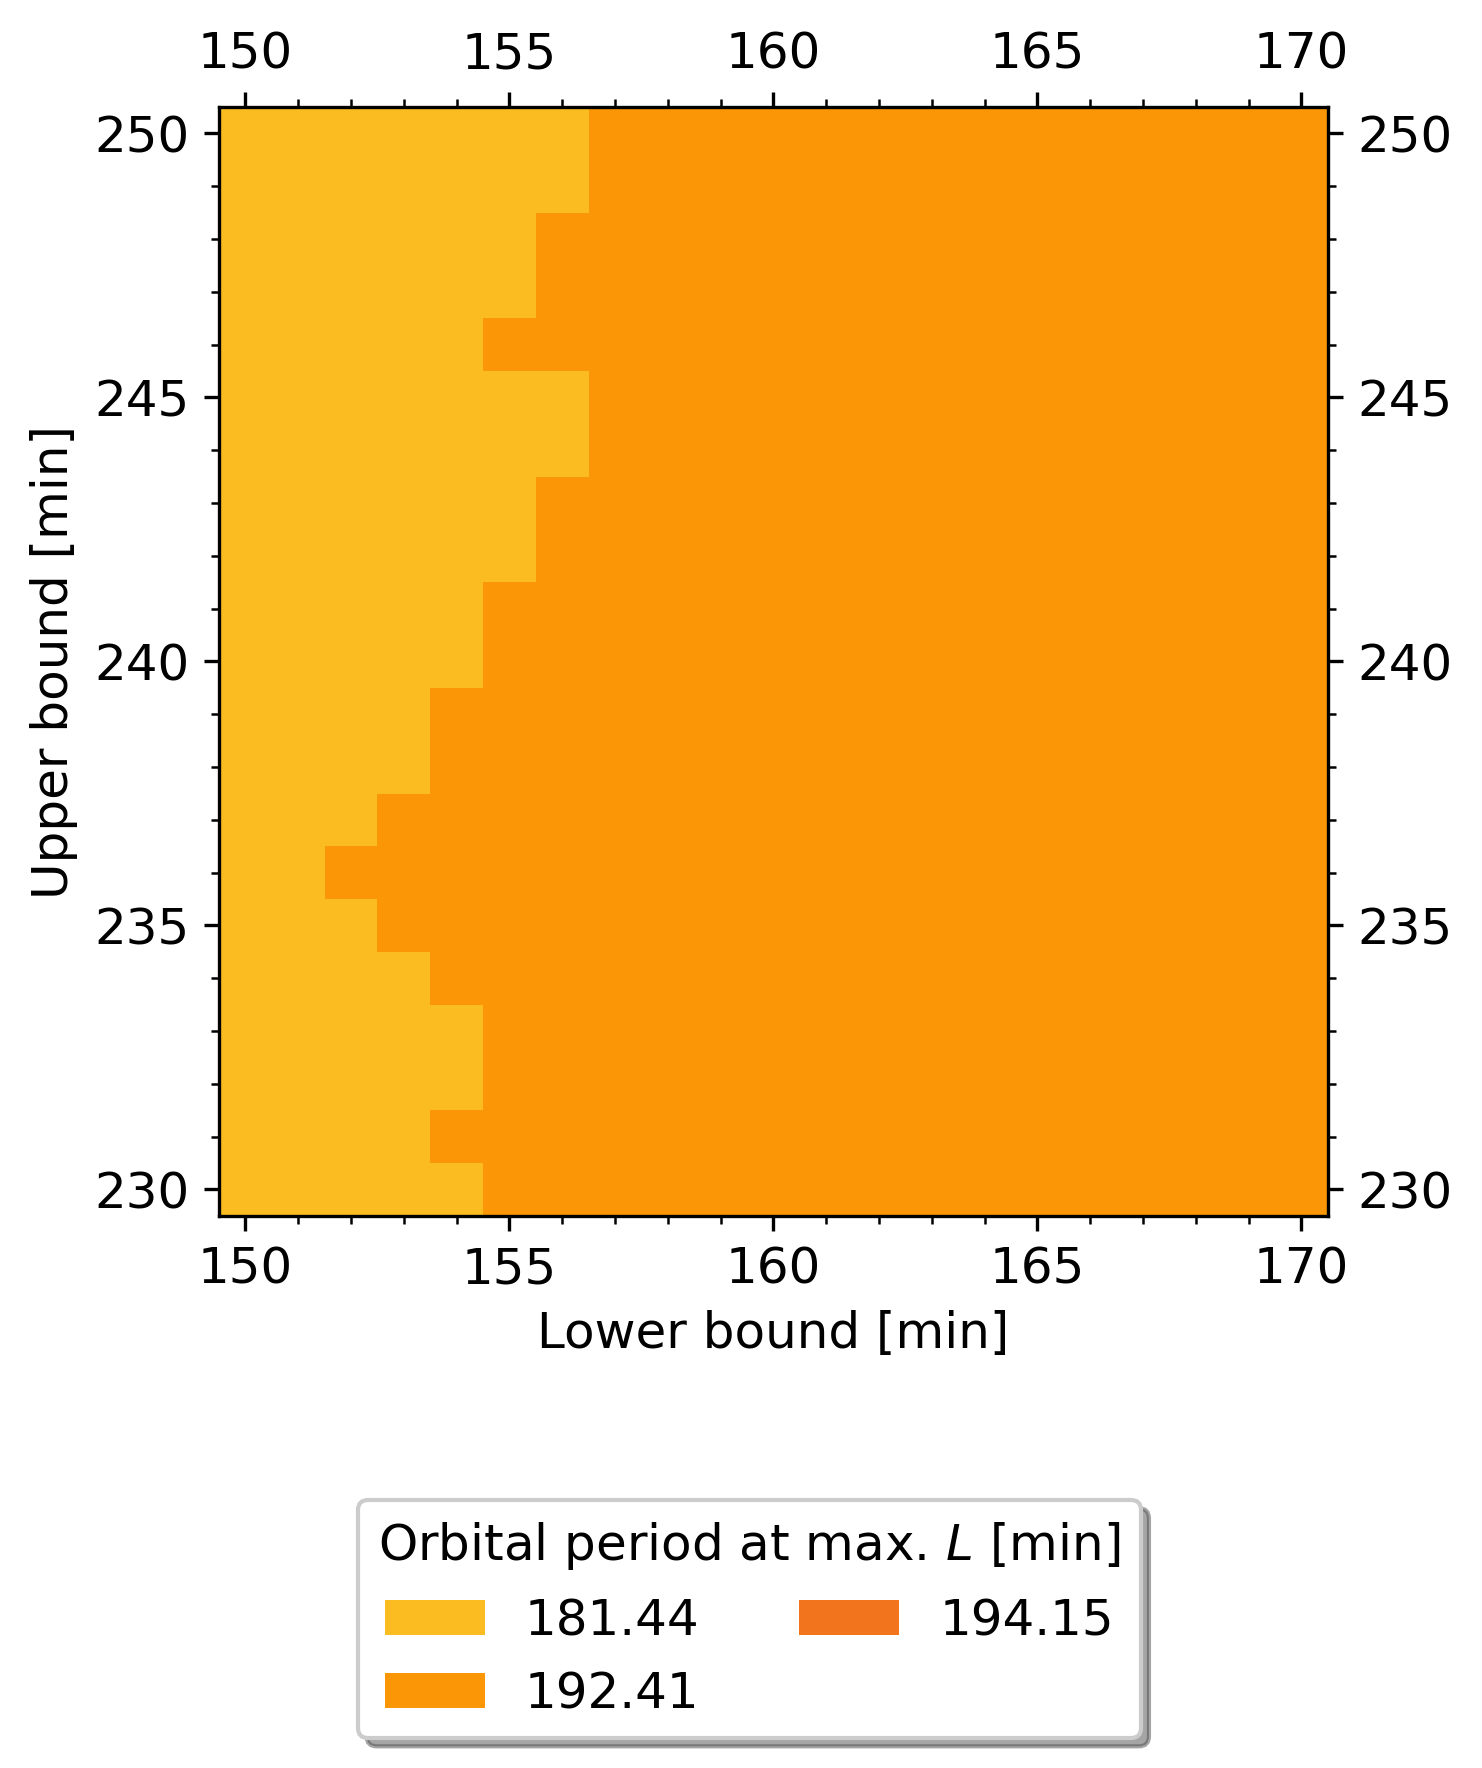

In [27]:
lower_bounds = np.arange(150, 171, 1)
upper_bounds = np.arange(230, 251, 1)
vals = LogL(lower_bounds, upper_bounds, non_polars_arr, 5)

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.patches import Patch
color_map = {168.62: np.array([252, 255, 164]), 
             175.68: np.array([243, 227, 90]), 
             181.44: np.array([251, 188, 33]), 
             192.41: np.array([251, 150, 6]), 
             194.15: np.array([242, 116, 28]),
             201.6 : np.array([225, 86, 53]),
             203.04: np.array([200, 63, 75]),
             205.96: np.array([173, 48, 93]),
             208.8 : np.array([141, 35, 105]),
             209.52: np.array([109, 24, 110]),
             210.72: np.array([79, 13, 108]),
             212.94: np.array([45, 11, 89]),
             235.47: np.array([14, 9, 43]),
             245.91: np.array([0, 0, 4]),
             } 

data = np.round(vals.reshape(21,21), 2)

data_3d = np.ndarray(shape=(data.shape[0], data.shape[1], 3), dtype=int)
for i in range(0, data.shape[0]):
    for j in range(0, data.shape[1]):
        data_3d[i][j] = color_map[data[i][j]]

fig, ax = plt.subplots(1, 1, dpi=300)
im = ax.imshow(data_3d, origin='lower')

legend_elements = [Patch(facecolor=color_map[key]/255.0, label=f'{key:.2f}') for key in color_map if key < 200 and key > 180]
ax.legend(handles=legend_elements, bbox_to_anchor=(0.5, -0.27), loc="lower center",bbox_transform=fig.transFigure, ncol=2, fancybox=True, shadow=True, fontsize=12, title="Orbital period at max. $L$ [min]", title_fontsize=12)
ax.set_xticks(np.arange(0, 21, 5), labels=np.arange(150, 171, 5))
ax.set_yticks(np.arange(0, 21, 5), labels=np.arange(230, 251, 5))
ax.xaxis.set_minor_locator(MultipleLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(labelsize=12, labelbottom=True, labelleft=True, labelright=True, labeltop=True, top=True, bottom=True, left=True, right=True, which='both')
ax.set_xlabel('Lower bound [min]', fontsize=12)
ax.set_ylabel('Upper bound [min]', fontsize=12)

Text(0, 0.5, 'Upper bound [min]')

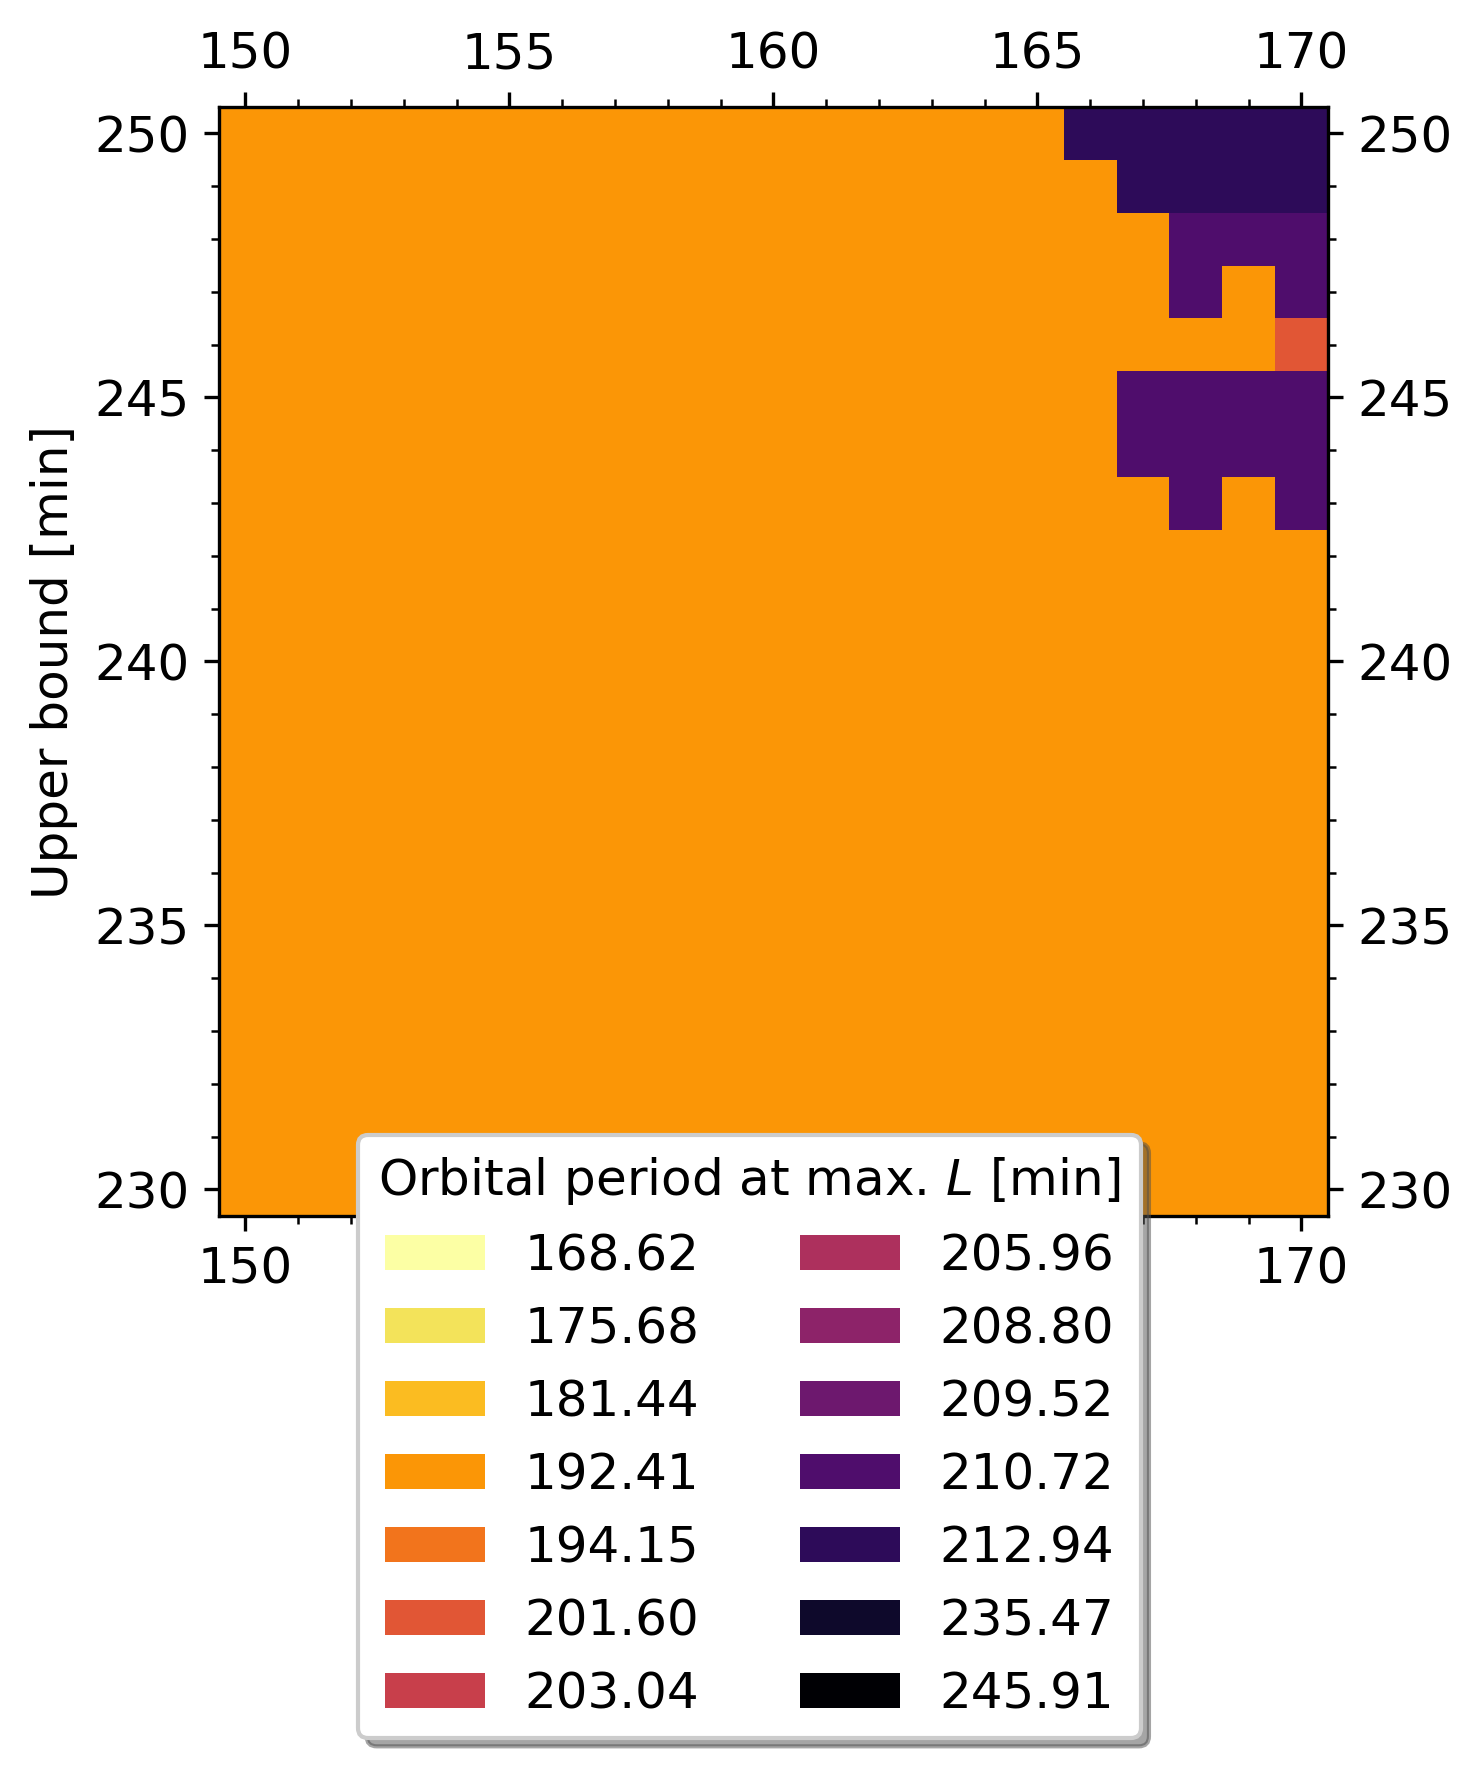

In [26]:
lower_bounds = np.arange(150, 171, 1)
upper_bounds = np.arange(230, 251, 1)
vals = LogL(lower_bounds, upper_bounds, non_polars_arr, 10)

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.patches import Patch
color_map = {168.62: np.array([252, 255, 164]), 
             175.68: np.array([243, 227, 90]), 
             181.44: np.array([251, 188, 33]), 
             192.41: np.array([251, 150, 6]), 
             194.15: np.array([242, 116, 28]),
             201.6 : np.array([225, 86, 53]),
             203.04: np.array([200, 63, 75]),
             205.96: np.array([173, 48, 93]),
             208.8 : np.array([141, 35, 105]),
             209.52: np.array([109, 24, 110]),
             210.72: np.array([79, 13, 108]),
             212.94: np.array([45, 11, 89]),
             235.47: np.array([14, 9, 43]),
             245.91: np.array([0, 0, 4]),
             } 
data = np.round(vals.reshape(21,21), 2)

data_3d = np.ndarray(shape=(data.shape[0], data.shape[1], 3), dtype=int)
for i in range(0, data.shape[0]):
    for j in range(0, data.shape[1]):
        data_3d[i][j] = color_map[data[i][j]]

fig, ax = plt.subplots(1, 1, dpi=300)
im = ax.imshow(data_3d, origin='lower')

legend_elements = [Patch(facecolor=color_map[key]/255.0, label=f'{key:.2f}') for key in color_map]
ax.legend(handles=legend_elements, bbox_to_anchor=(0.5, -0.27), loc="lower center",bbox_transform=fig.transFigure, ncol=2, fancybox=True, shadow=True, fontsize=12, title="Orbital period at max. $L$ [min]", title_fontsize=12)
ax.set_xticks(np.arange(0, 21, 5), labels=np.arange(150, 171, 5))
ax.set_yticks(np.arange(0, 21, 5), labels=np.arange(230, 251, 5))
ax.xaxis.set_minor_locator(MultipleLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(labelsize=12, labelbottom=True, labelleft=True, labelright=True, labeltop=True, top=True, bottom=True, left=True, right=True, which='both')
ax.set_xlabel('Lower bound [min]', fontsize=12)
ax.set_ylabel('Upper bound [min]', fontsize=12)

Text(0, 0.5, 'Upper bound [min]')

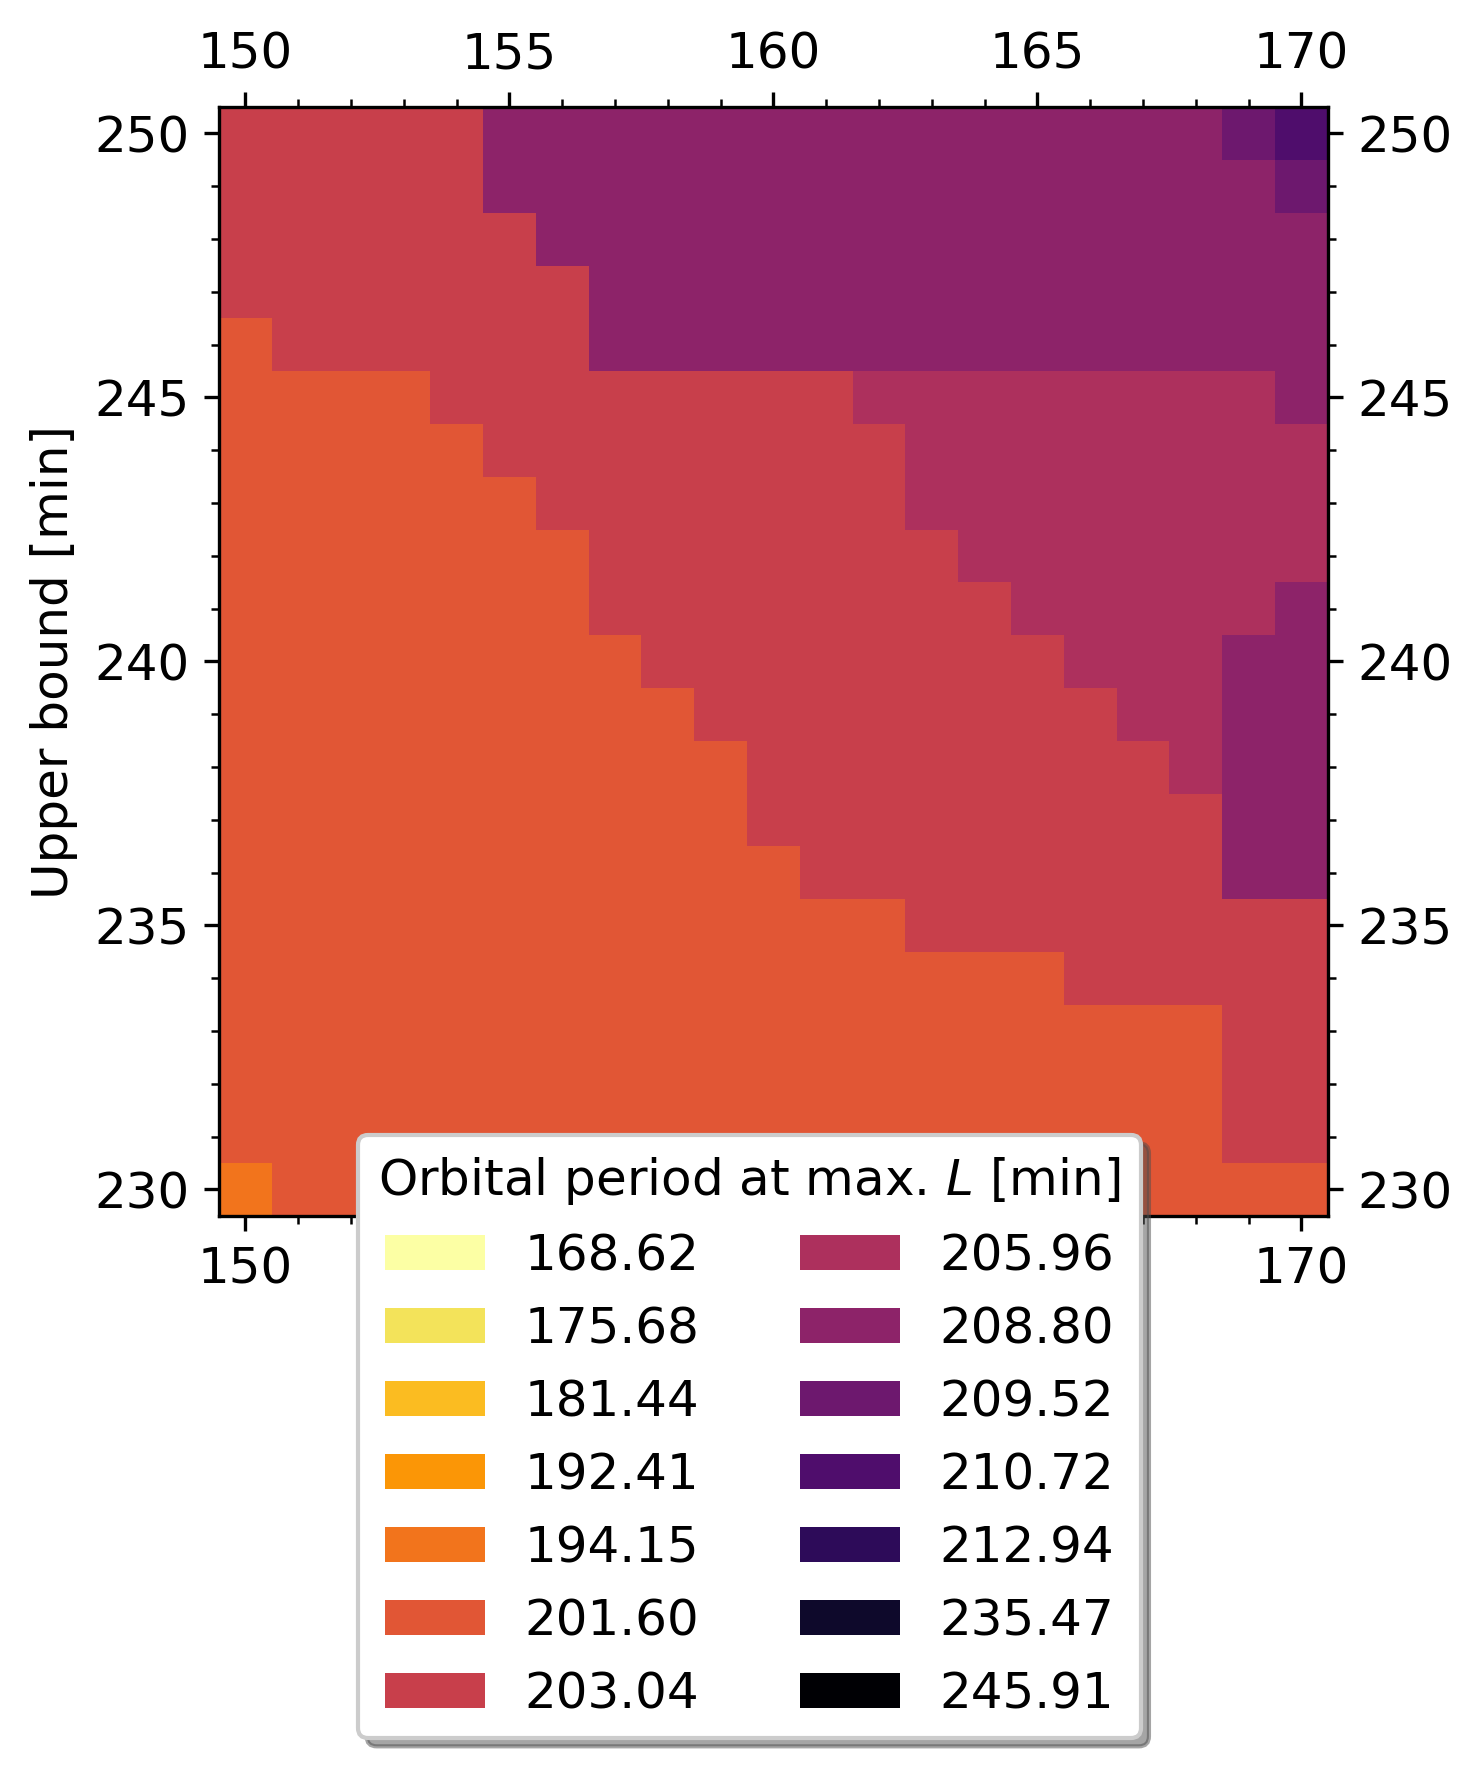

In [40]:
lower_bounds = np.arange(150, 171, 1)
upper_bounds = np.arange(230, 251, 1)
vals = LogL(lower_bounds, upper_bounds, non_polars_arr, 10)

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.patches import Patch
color_map = {168.62: np.array([252, 255, 164]), 
             175.68: np.array([249, 203, 53]), 
             181.44: np.array([249, 142, 9]), 
             192.41: np.array([228, 90, 49]), 
             201.6 : np.array([188, 55, 84]),
             210.72: np.array([138, 34, 106]),
             212.94: np.array([87, 16, 110]),
             235.47: np.array([33, 12, 74]),
             245.91: np.array([0, 0, 4]),
             } 

data = np.round(vals.reshape(21,21), 2)

data_3d = np.ndarray(shape=(data.shape[0], data.shape[1], 3), dtype=int)
for i in range(0, data.shape[0]):
    for j in range(0, data.shape[1]):
        data_3d[i][j] = color_map[data[i][j]]

fig, ax = plt.subplots(1, 1, dpi=300)
im = ax.imshow(data_3d, origin='lower')

legend_elements = [Patch(facecolor=color_map[key]/255.0, label=f'{key:.2f}') for key in color_map]
ax.legend(handles=legend_elements, bbox_to_anchor=(0.5, -0.27), loc="lower center",bbox_transform=fig.transFigure, ncol=2, fancybox=True, shadow=True, fontsize=12, title="Orbital period at max. $L$ [min]", title_fontsize=12)
ax.set_xticks(np.arange(0, 21, 5), labels=np.arange(150, 171, 5))
ax.set_yticks(np.arange(0, 21, 5), labels=np.arange(230, 251, 5))
ax.xaxis.set_minor_locator(MultipleLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(labelsize=12, labelbottom=True, labelleft=True, labelright=True, labeltop=True, top=True, bottom=True, left=True, right=True, which='both')
ax.set_xlabel('Lower bound [min]', fontsize=12)
ax.set_ylabel('Upper bound [min]', fontsize=12)

Text(0.02, 0.5, 'Upper bound [min]')

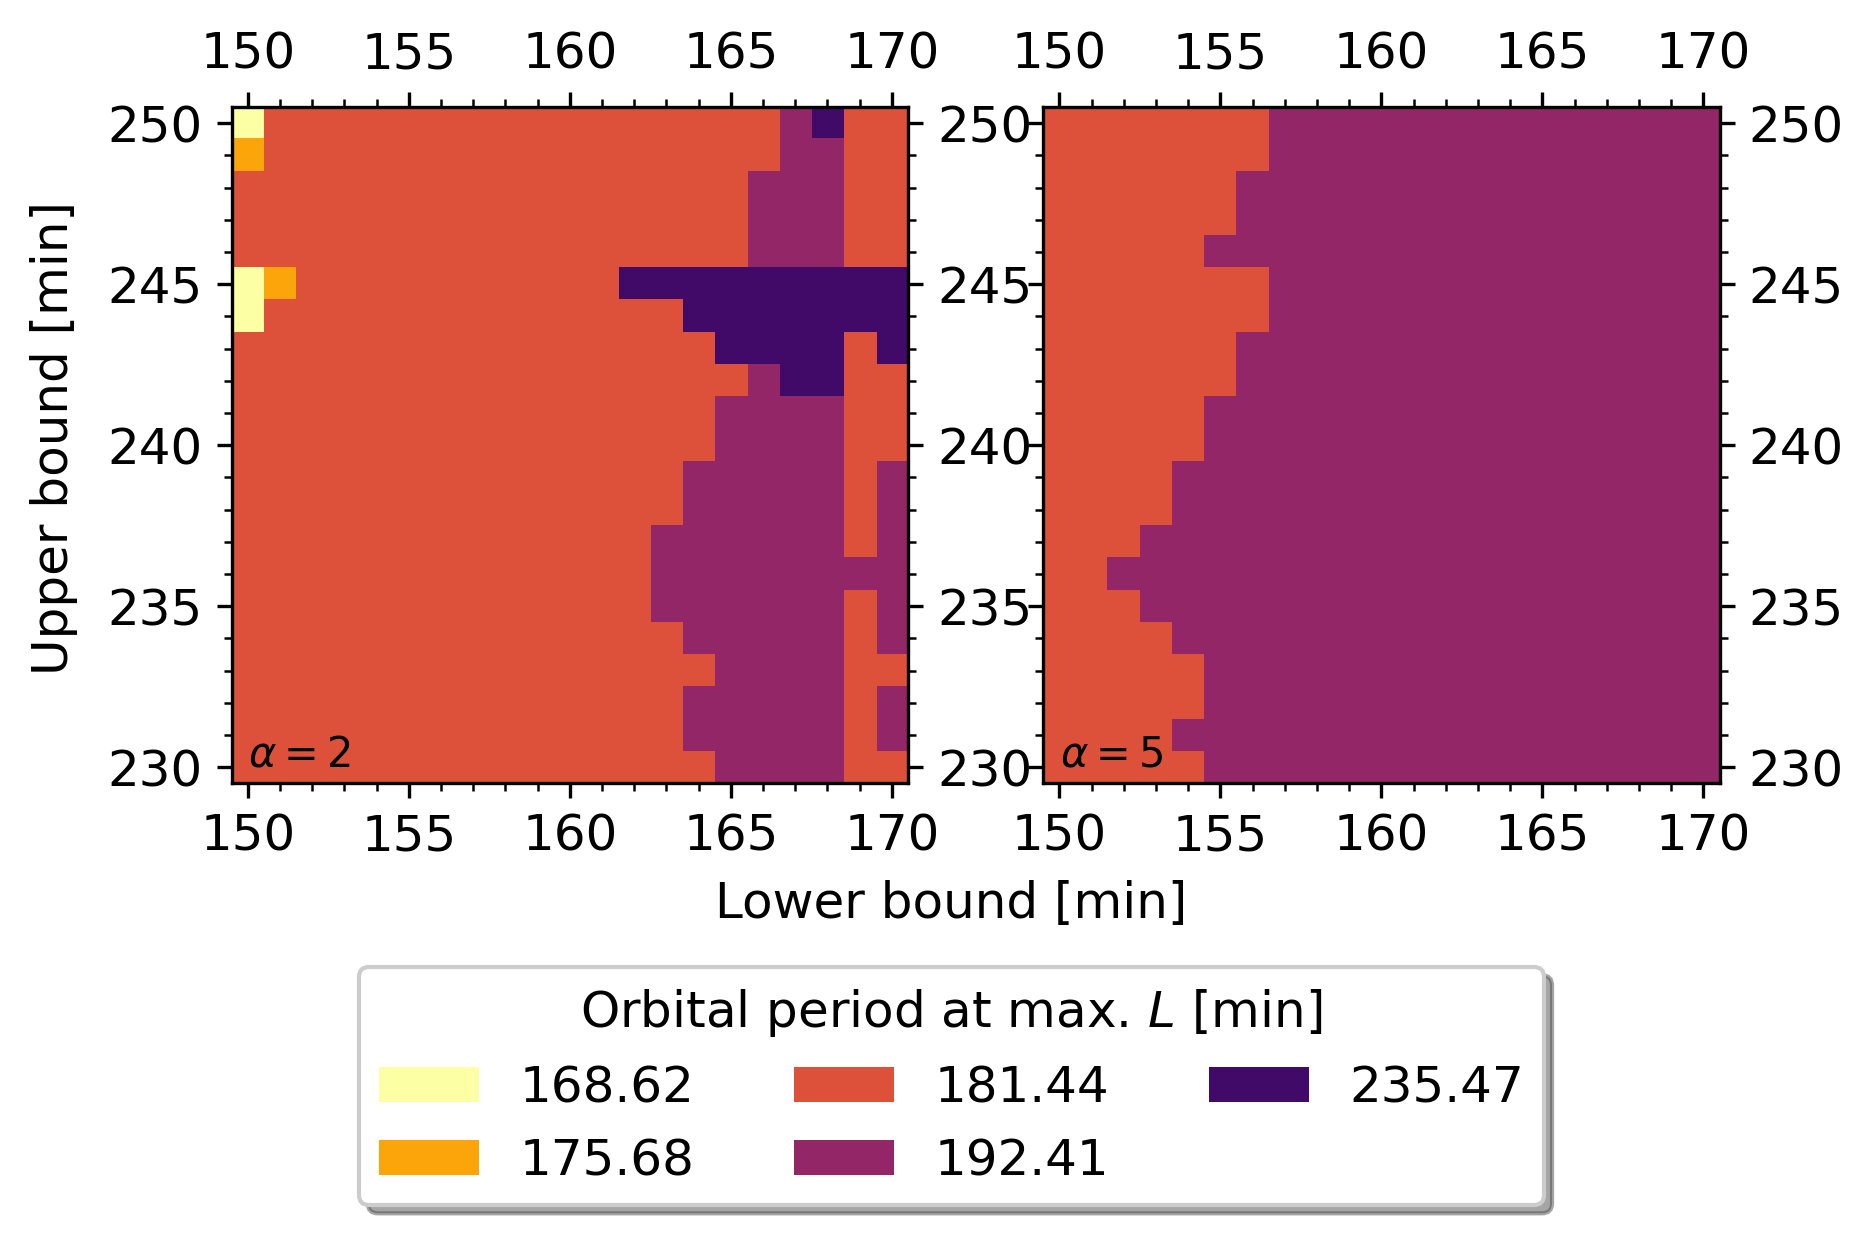

In [116]:
color_map = {168.62: np.array([252, 255, 164]), 
             175.68: np.array([252, 165, 10]), 
             181.44: np.array([221, 81, 58]), 
             192.41: np.array([147, 38, 103]), 
             235.47: np.array([66, 10, 104]),
             245.91: np.array([0, 0, 4]),
             } 


vals1 = LogL(lower_bounds, upper_bounds, non_polars_arr, 1+1e-6)
vals2 = LogL(lower_bounds, upper_bounds, non_polars_arr, 2)
vals3 = LogL(lower_bounds, upper_bounds, non_polars_arr, 5)
# vals4 = LogL(lower_bounds, upper_bounds, non_polars_arr, 10)

data1 = np.round(vals1.reshape(21,21), 2)

data_3d1 = np.ndarray(shape=(data1.shape[0], data1.shape[1], 3), dtype=int)
for i in range(0, data1.shape[0]):
    for j in range(0, data1.shape[1]):
        data_3d1[i][j] = color_map[data1[i][j]]

data2 = np.round(vals2.reshape(21,21), 2)

data_3d2 = np.ndarray(shape=(data2.shape[0], data2.shape[1], 3), dtype=int)
for i in range(0, data2.shape[0]):
    for j in range(0, data2.shape[1]):
        data_3d2[i][j] = color_map[data2[i][j]]

data3 = np.round(vals3.reshape(21,21), 2)

data_3d3 = np.ndarray(shape=(data3.shape[0], data3.shape[1], 3), dtype=int)
for i in range(0, data3.shape[0]):
    for j in range(0, data3.shape[1]):
        data_3d3[i][j] = color_map[data3[i][j]]

# data4 = np.round(vals4.reshape(21,21), 2)

# data_3d4 = np.ndarray(shape=(data4.shape[0], data4.shape[1], 3), dtype=int)
# for i in range(0, data4.shape[0]):
#     for j in range(0, data4.shape[1]):
#         data_3d4[i][j] = color_map[data4[i][j]]


fig = plt.figure(dpi=300)
gs = fig.add_gridspec(1, 2)
axes = gs.subplots(sharex=True, sharey=True)
axes[0].imshow(data_3d2, origin='lower')
axes[1].imshow(data_3d3, origin='lower')
# axes[1, 0].imshow(data_3d3, origin='lower')
# axes[1, 1].imshow(data_3d4, origin='lower')
legend_elements = [Patch(facecolor=color_map[key]/255.0, label=f'{key:.2f}') for key in color_map if key != 212.94 and key != 245.91 and key != 210.72 and key != 201.6]
fig.legend(handles=legend_elements, bbox_to_anchor=(0.5, -0.05), loc="lower center",bbox_transform=fig.transFigure, ncol=3, fancybox=True, shadow=True, fontsize=12, title="Orbital period at max. $L$ [min]", title_fontsize=12)
axes[0].set_xticks(np.arange(0, 21, 5), labels=np.arange(150, 171, 5))
axes[0].set_yticks(np.arange(0, 21, 5), labels=np.arange(230, 251, 5))
axes[0].xaxis.set_minor_locator(MultipleLocator())
axes[0].yaxis.set_minor_locator(AutoMinorLocator())
axes[0].tick_params(labelsize=12, labelbottom=True, labelleft=True, labelright=True, labeltop=True, top=True, bottom=True, left=True, right=True, which='both')
axes[0].text(0.02, 0.02, '$\\alpha = 2$', fontsize=10)
# axes[0].set_xlabel('Lower bound [min]', fontsize=12)
# axes[0].set_ylabel('Upper bound [min]', fontsize=12)

axes[1].set_xticks(np.arange(0, 21, 5), labels=np.arange(150, 171, 5))
axes[1].set_yticks(np.arange(0, 21, 5), labels=np.arange(230, 251, 5))
axes[1].xaxis.set_minor_locator(MultipleLocator())
axes[1].yaxis.set_minor_locator(AutoMinorLocator())
axes[1].tick_params(labelsize=12, labelbottom=True, labelleft=False, labelright=True, labeltop=True, top=True, bottom=True, left=True, right=True, which='both')
axes[1].text(0.02, 0.02, '$\\alpha = 5$', fontsize=10)
# axes[1].set_xlabel('Lower bound [min]', fontsize=12)
# axes[1].set_ylabel('Upper bound [min]', fontsize=12)
# axes[1].label_outer()
fig.supxlabel('Lower bound [min]', y=0.16, fontsize=12)
fig.supylabel('Upper bound [min]', fontsize=12)
# fig.tight_layout()